# SOLUTION: PRACTICE for the QBUS3840 In-semester exam
# NOTE 1: In the exercises, example answers are given in cursive, side comments are in normal font type. I have added an approximation of the marks for each question, indicating which questions are more important. The more important ones are the ones we estimate the models. Among the two complex model and comparison is the most important one. Then the what if scenarios and finally the smaller/quicker questions.

# NOTE 2: This solution uses auxiliary functions, you are welcome to use them in the exam (just copy paste the cells somwhere before the questions begin) or create your own.

# NOTE 3: The notebook can be downloaded from google colab as in the screenshot below. Then it can be uploaded to canvas.


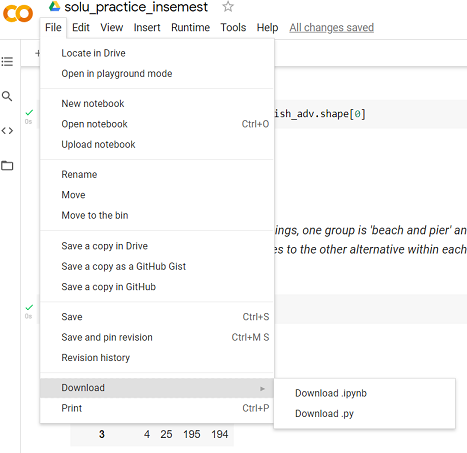


---
---



# Rubric
* The **marking scheme** is simple: Each question has a some points assigned. Then the points for each question are divided between
  * Code: 50% is it works OK, 35% if minor problems, 20% it does not work but is well explained.
  * Text explanations: 40% if it is: Clearly written. Complete, all points are addressed. Decisions are properly justified, the right reasons are given for the answer. Demonstrates knowledge of the topic, explaining nuances/ alternatives. Then it will degrade from 40% it is fails to achieve that.
  * Appearance: the remaining 10%. Structure sections if needed. Properly sized inputs. Even mix of code cells and explanations instead of very few large cells. Code should be readable.



#Guidelines

* The exam will be a colab notebook that you have o fill in, then upload to canvas.

* You will have **90 minutes** to do the exam,  plus 15 minutes to upload. This is an **important point**, try to become familiar with the functions to run biogeme, pandas, numpy... Even if you have full access to the material of the course and can look at online programming forums for python issues, it might take some extra time. You can also prepare you own auxiliary functions to reduce the verbosity of biogeme. We will see this in the practice notebook.

* **The questions will be very similar to what you will see in this practice notebook.** The point of the exam is to prove that you can do a basic analysis with a multinomial logit and use biogeme as a tool. The differenciation will come mostly in the type of data, what variables are involved and the 'what-if scenarios' questions.

* The answers should be technically correct, but **the explanation in the text cells should demonstrate knowledge** of what you are doing. Why did you make that decision?. For example, a variable transformation, why do you choose that particular one? Why do you choose to add that variable to the model? What do you think it is going to do? After the results: Are the results as expected? Please do not be afraid of being 'too obvious' when explaining something.
When explaining coefficients, Do these have the expected sign, what is the interpretation with respect to the reference alternative?
 A perfect code but no explanation will net you 50-60% of the marks. The opposite example, if you get stuck with a python issue but know 'conceptually' how to answer, writing a good text explanation and some pseudocode will potentially net you up to half marks.


* There will be no data cleaning involved, and the dataset will have full availability, you can create a full availability dictionary to pass to biogeme by just setting all entries to 1. ` av = {1:1, 2:1, 3:1, ...}`. We will see this in the practice.

* Please **do not to identify yourself explicitly in the anwers**, writing your name or student id. Besides that, you are free to express yourself.

* The 'visual appearance' part of the exam stands for a small percentage of the mark, 10%. Try to clarify, do not leave very large code cells followed/ preceded by large text cells, try to interleave them so it is more natural to follow. Section you answers if they become long or address different topics. Do not write very long outputs, for example do not print the full dataset. It is critical that the main part of each answer is cleary identified with its own text cell and code cell. The bad example would be a large text cell explaining all the steps and the a large code cell that prints the output, with the answers in the middle of the code. Of course, if your answer does not require code (it might happen) do not force a code chunk in. The way I will mark the visual part is to read the notebook and if something stands out in a negative sense, this subtracts points.

* There can be one or two small 'theoretical' questions that can be answered directly by understanding some theoretical concepts. The question can also
be solved practically by estimating a model.

* The dataset will be based on a real one with some modifications, it will be somewhat fictional.



# The practice problem

We will model a dataset of choice of 'recreational fishing' mode, this is whether to go for a shipping trip in either the beach, the pier, a public charter boat or a private boat. The data was collected via phone interview and
the attributes of the alternatives are the cost of the trip and the 'catch rate', the expected number of catches per hour for the particular species of fish that each fisher was targeting in their trip.
The socio-economic characteristics is income, in fact the dataset was used to study different transformations of the income variable and how they influence utility, the larger consequences

The reference study, including a more detailed description of the dataset ca be found [here (Section IV Data and references therein)](https://lib.dr.iastate.edu/cgi/viewcontent.cgi?article=1017&context=econ_las_pubs)

## Description of the dataset

Each row represents a different customer, customers are 'independent' of each other.

The variables in the dataset are:

**mode**: a categorical variable indicating the fishing model selected for the trip. It is encoded in numbers, with the code:
 1. Beach
 2. Pier
 3. Private boat
 4. Charter boat

**price_x**:  Cost of the fishing mode, variable in dollars. Where x stands for one of the alternatives, e.g. price_beach is the cost of the fishing from the beach in one fishing trip.

**catch_x**: Catch rate, in catches per hour. Where x stands for one of the alternatives, e.g. catch_beach is the catch rate of the beach alternative.

**income**: Monthly income of the recreational fisher, in dollars.


---
---

# Preparing the environment
*The preparation and dataset loading code is given to the students*

In [1]:
!pip install biogeme

Load the packages, feel free to change the names.

In [2]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt

import biogeme.database as db
import biogeme.biogeme as bio
import biogeme.models as models
import biogeme.expressions as exp
import biogeme.tools as tools

# Load the dataset

In [3]:
path = 'https://raw.githubusercontent.com/pmontman/pub-choicemodels/main/data/fishing.csv'
fish_pd = pd.read_csv(path)

A simple look at the dataset.

In [4]:
fish_pd.head(5)

,mode,price_beach,price_pier,price_boat,price_charter,catch_beach,catch_pier,catch_boat,catch_charter,income
0,4,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317
1,4,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998
2,3,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999
3,2,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332
4,3,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320


---
---

# Auxiliary functions

The first function takes the dictionary of utilities, a pandas dataframe, and the name of the variable that contains the variable with the results of the choice. It returns the biogeme object with the model and the estimated 'results' object (the one we get the values, likelihoods, etc.)
We have added the dictionary with the utilities to the biogeme object, in case we use it later.

In [5]:
def qbus_estimate_bgm(V, pd_df, tgtvar_name, modelname='bgmdef'):
 av = {1: 1,
       2: 1,
       3: 1,
       4: 1}
 bgm_db = db.Database(modelname + '_db', pd_df)
 globals().update(bgm_db.variables)
 logprob = models.loglogit (V , av , bgm_db.variables[tgtvar_name] )
 bgm_model = bio.BIOGEME ( bgm_db, logprob )
 bgm_model.utility_dic = V.copy()
 return bgm_model, bgm_model.estimate()

The next function will calculate the predictions for a given biogeme object that was estimated with `qbus_estimate_bgm`. The output is the array with the choice probabilities. From the choice probabilities, this can be used to calculate accuracies, confusion matrices and the output of what-if scenarios.

In [6]:
def qbus_simulate_bgm(qbus_bgm_model, betas, pred_pd_df):
  av_auto = qbus_bgm_model.utility_dic.copy()
  for key, value in av_auto.items():
   av_auto[key] = 1

  targets = qbus_bgm_model.utility_dic.copy()
  for key, value in targets.items():
   targets[key] = models.logit(qbus_bgm_model.utility_dic, av_auto, key)

  bgm_db = db.Database('simul', pred_pd_df)
  globals().update(bgm_db.variables)
  bgm_pred_model = bio.BIOGEME(bgm_db, targets)
  simulatedValues = bgm_pred_model.simulate(betas)
  return simulatedValues

The function `qbus_calc_accu_confusion` calculates the accuracies given the choice probability predictions a pandas dataset and the specification of the name that contains the actual choices in the input dataset.

In [7]:
def qbus_calc_accu_confusion(sim_probs, pd_df, choice_var):
  which_max = sim_probs.idxmax(axis=1)
  data = {'y_Actual':   pd_df[choice_var],
          'y_Predicted': which_max
        }

  df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
  confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
  accu = np.mean(which_max == pd_df[choice_var])
  return accu, confusion_matrix

The next function calculates the likelihood ratio test having to write a bit less code that the default biogeme function. The arguments are the results objects of the two models to be compared. The first is the more complex and the second is the reference model (**the order is important!**). The third argument is the significance level for the test.

In [8]:
def qbus_likeli_ratio_test_bgm(results_complex, results_reference, signif_level):
  return tools.likelihood_ratio_test( (results_complex.data.logLike, results_complex.data.nparam),
                                     (results_reference.data.logLike, results_reference.data.nparam), signif_level)

The next function just updates the globals so we can use it

In [9]:
def qbus_update_globals_bgm(pd_df):
   globals().update(db.Database('tmp_bg_bgm_for_glob', pd_df).variables)

---
---

# 1) **(2 points)** Adjust a model with alternative specific constants and shared parameters for price and catch rate. Select one of the alternatives as the reference (pick the one that you prefer). Comment on the results: Signs of the variables and alternative specific constants.

*We create the expression for the betas, the parameters of the model. The absolute levels of utilities cannot be completely recovered when estimating the model from observed choice. We can set one of the alternatives as the reference and fix the value of its alternative specific constant to 0. We choose the alternative 'charter boat' as reference, we will interpret the results of the ASC if positive as 'more utility than the reference for the same values of price and catch rate.' Negative values as 'less utility than the reference for the same values of price and catch rate'.*

In [10]:
ASC_beach = exp.Beta ( 'ASC_beach' ,0, None , None ,0)
ASC_pier = exp.Beta ( 'ASC_pier' ,0, None , None ,0)
ASC_boat = exp.Beta ( 'ASC_boat' ,0, None , None ,0)
ASC_charter = exp.Beta ( 'ASC_charter' ,0, None , None ,1)
B_price = exp.Beta ( 'B_price' ,0, None , None ,0)
B_catch = exp.Beta ( 'B_catch' ,0, None , None ,0)

We need to update the globals of the python environment so we can later define the utilities directly.

In [11]:
qbus_update_globals_bgm(fish_pd)

We define the observed utilities functional forms and create the dictionary that groups them together and assign each one to the number that identifies each alternative in the dataset.

In [12]:
V_beach = ASC_beach + B_price*price_beach + B_catch*catch_beach
V_pier = ASC_pier + B_price*price_pier + B_catch*catch_pier
V_boat = ASC_boat + B_price*price_boat + B_catch*catch_boat
V_charter = ASC_charter + B_price*price_charter + B_catch*catch_charter

V_base = {1: V_beach,
     2: V_pier,
     3: V_boat,
     4: V_charter}

The estimate the model using our auxiliary function. We pass the utilities dictionary, the pandas dataframe with the data and the name of the variable in the dataframe that contains the choices. The fourth argument is optional and indicates the name for the model.
The output will be two objects, the biogeme object and the results object.

In [13]:
model_base, results_base = qbus_estimate_bgm(V_base, fish_pd, 'mode', 'fish')

File biogeme.toml has been created
You have not defined a name for the model. The output files are named from the model name. The default is [biogemeModelDefaultName]


*The estimated the coefficients show:*
 * *The estimated 'ASC' are all negative, indicating that they have less utility than the reference for the same catch rate and price. The lowest utility comes from the beach alternative, the boat then pier and then charter boat and the reference charter with 0.*
 * *The coefficients of the variables have the expected signs. The beta for catch_rate is positive, indicating that the higher the catch rate, the more utility for that alternative. The beta for price is negative, indicating that utility goes down when the price increases*

In [14]:
results_base.getEstimatedParameters()

,Value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_beach,-1.498888,0.129703,-11.556272,0.000000e+00
ASC_boat,-0.627513,0.116828,-5.371252,7.819206e-08
ASC_pier,-1.191833,0.128328,-9.287410,0.000000e+00
B_catch,0.377169,0.119247,3.162911,1.561999e-03
B_price,-0.024790,0.002329,-10.645098,0.000000e+00


---
---

# 2) **(1 point)** Calculate the willingness to pay for increasing the catch rate and comment on the interpretation



*Because it is a purely linear specification of the utilities, we can quickly compute the WTP as the ratio of the estimated coefficients. A value of -15 indicates that the individuals are willing to pay 15 dollars for an increase the catch rate of 1 capture per hour.* (Comment not required for the exam: The WTP seems a little small, considering that most catch rates are small numbers below 1, maybe a more detailed model would do better.)

In [15]:
betas = results_base.getBetaValues()
betas['B_catch'] / betas['B_price']

-15.214831589854683

---
---

# 3) **(3 points)** Fit per-alernative parameters for cost and catch rate. Pick one variable that has not been considered and create a model, apply a transformation of your choosing and estimate a new model. Comment on the results and compare the new model to the model in Exercise 1. What changes are relevant? Is the new model a better fit?


*We add the income variable in the next code cell, it will be introduced into the model with a logarithm transformation because we expect differences at the higher levels of income to be less important than differences at the lower levels of income.* (Note for the exam: you could have picked other variables, maybe more than one, or even transform the cost variable or catch rate, just be aware of it in the what if scenarios.)

In [16]:
fish_adv = fish_pd.copy()
fish_adv['log_income'] = np.log(fish_adv['income'])
fish_adv['log_income'].describe()

count    1182.000000
mean        8.130302
std         0.659004
min         6.032287
25%         7.641724
50%         8.229511
75%         8.597236
max         9.433484
Name: log_income, dtype: float64

In [17]:
B_price_beach = exp.Beta ( 'B_price_beach' ,0, None , None ,0)
B_price_pier = exp.Beta ( 'B_price_pier' ,0, None , None ,0)
B_price_boat = exp.Beta ( 'B_price_boat' ,0, None , None ,0)
B_price_charter = exp.Beta ( 'B_price_charter' ,0, None , None ,0)

B_catch_beach = exp.Beta ( 'B_catch_beach' ,0, None , None ,0)
B_catch_pier = exp.Beta ( 'B_catch_pier' ,0, None , None ,0)
B_catch_boat = exp.Beta ( 'B_catch_boat' ,0, None , None ,0)
B_catch_charter = exp.Beta ( 'B_catch_charter' ,0, None , None ,0)

B_log_income_beach = exp.Beta ( 'B_log_income_beach' ,0, None , None ,0)
B_log_income_pier = exp.Beta ( 'B_log_income_pier' ,0, None , None ,0)
B_log_income_boat = exp.Beta ( 'B_log_income_boat' ,0, None , None ,0)
B_log_income_charter = exp.Beta ( 'B_log_income_charter' ,0, None , None ,0)


In [18]:
qbus_update_globals_bgm(fish_adv)

The next cell is going to be the most verbose cell in the whole exam.

In [19]:

V_beach_adv = ASC_beach + B_price_beach*price_beach + B_catch_beach*catch_beach + B_log_income_beach*log_income
V_pier_adv = ASC_pier + B_price_pier*price_pier + B_catch_pier*catch_pier + B_log_income_pier*log_income
V_boat_adv = ASC_boat + B_price_boat*price_boat + B_catch_boat*catch_boat + B_log_income_boat*log_income
V_charter_adv = ASC_charter + B_price_charter*price_charter + B_catch_charter*catch_charter + B_log_income_charter*log_income

V_adv = {1: V_beach_adv,
     2: V_pier_adv,
     3: V_boat_adv,
     4: V_charter_adv}

In [20]:
model_adv, results_adv = qbus_estimate_bgm(V_adv, fish_adv, 'mode', 'fish_adv')

You have not defined a name for the model. The output files are named from the model name. The default is [biogemeModelDefaultName]


Here we should add some basic comments on the results, some examples, you do need to put that many.:
* *The relative order for the ASCs changes with respect to the reference model boat and pier swap positions in the relative ranking under the same price,catch rate, income.*
* *There is a large difference on the estimated coefficients for the catch rate, this influence might be behind the poor WTP estimation.*
* *The income variable seem to be influential, and its sign changes among alternatives. The influence of income is small on pier and private boat alternatives. The influence of income if much larger for beach and charter alternatives. Income increases the utility of the beach alternative and decreases the utility of boat alternative. The richer you are, the less utility you derive for the charter boat.* (Non exam comment: Maybe rich people do not like to be sharing the small space of a boat... and they go to exotic beaches)
* *A quick calculation of the WTP, now they are more reasonable, the WTP for catch rate in the charter boat is close to 45.*


In [21]:
results_adv.getEstimatedParameters()

,Value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_beach,-7.170295,1.626086,-4.409541,1.035897e-05
ASC_boat,-4.336817,1.012187,-4.284603,1.830659e-05
ASC_pier,-2.834089,1.315069,-2.155088,3.115495e-02
B_catch_beach,4.906081,0.865570,5.668038,1.444422e-08
B_catch_boat,2.463727,0.454617,5.419347,5.981720e-08
B_catch_charter,0.759834,0.138577,5.483103,4.179287e-08
B_catch_pier,4.796395,0.912223,5.257921,1.456929e-07
B_log_income_beach,0.383675,0.134641,2.849614,4.377237e-03
B_log_income_boat,0.089255,0.106887,0.835043,4.036936e-01
B_log_income_charter,-0.398277,0.090827,-4.385019,1.159757e-05


*To compare the models we will use the likelihood ratio test, the rejection that we see indicates that the more complex model is a better fit than the reference.*

In [22]:
qbus_likeli_ratio_test_bgm(results_adv, results_base, 0.05)

LRTuple(message='H0 can be rejected at level 5.0%', statistic=127.0319470358445, threshold=18.307038053275146)

---
---

# 4) (**1 point**) Calculate the predictions of that model and confusion matrix, comment on the results


In [23]:
prob_preds = qbus_simulate_bgm(model_adv, results_adv.getBetaValues(), fish_adv)

*We get a predictive accuracy of 0.49, the model correctly predicts which alternative is going to be chosen close to 50% of the time.*

In [24]:
accu, conf_mat = qbus_calc_accu_confusion(prob_preds, fish_adv, 'mode')
accu

0.48646362098138746

 *An accurary of 49% represents an improvement over a baseline of predicting 'always charter boat', would get an accuracy of 38% (in the cell below).*

In [25]:
fish_adv['mode'].value_counts() / fish_adv.shape[0]

4    0.382403
3    0.353638
2    0.150592
1    0.113367
Name: mode, dtype: float64

*The confusion matrix shows two clear groupings, one group is  'beach and pier' and the second group is 'the boats'. We see thaat the majority prediction errors produced in each group goes to the other alternative within each group. For example, errors when prediciting beach are often prediction of pier and vice-versa.*

In [26]:
conf_mat

Predicted,1,2,3,4
Actual,,,,
1,21,68,16,29
2,18,97,19,44
3,4,25,195,194
4,7,29,154,262


---
---

# 5) (**2 points**) Suppose that the company that runs the charter boats is offering a 75% discount for the population with a monthly income under 2100 dollars. What would be the market share of the new situation?

*We create a new dataset representing the what if scenario. We modifify the price of the charter alternative only for the individuals that have income below 2100*

In [27]:
fish_dis = fish_adv.copy()
fish_dis.loc[fish_dis['income'] < 2100, 'price_charter'] *= 0.25

*We calculate the market share as the average of the choice probabilities of each alternative predicted by the model in the what-if scenario dataset.*

In [28]:
qbus_simulate_bgm(model_adv, results_adv.getBetaValues(), fish_dis).mean(axis=0)

1    0.106240
2    0.137633
3    0.334779
4    0.421348
dtype: float64

*Comparing to the reference scenario, shown below, the market share of the charter boat has gone up by 4 points.*

In [29]:
qbus_simulate_bgm(model_adv, results_adv.getBetaValues(), fish_adv).mean(axis=0)

1    0.113367
2    0.150592
3    0.353638
4    0.382402
dtype: float64

---
---

# 6) (**2 points**) Due to poor weather conditions at sea, the fishing trips that go farther away from the coast (both private and charter boats) are going to cut capture rate by half during the season. What would be the expected impact in the total revenue from fishing trips during the season (assume that everythin else stays the same (the same fishers still go for a trip and the remaining variables do not change)

*We create a dataset with the values for the variables `catch_boat` and `catch_charter` reduced by half. To calculate the expected revenue, we calculate the choice probabilities predicted by the model and multiply them by the prices of each alternative, the total revenue will be the sum of that.*

In [30]:
fish_weather = fish_adv.copy()
fish_weather['catch_boat'] *= 0.5
fish_weather['catch_charter'] *= 0.5


preds = qbus_simulate_bgm(model_adv, results_adv.getBetaValues(), fish_weather)


rev = preds.to_numpy() * fish_weather[ ['price_beach', 'price_pier', 'price_boat', 'price_charter']].to_numpy()
rev.sum()

60880.05431665258

*To get a better perspective, we calculate the revenue of the model in the reference scenario. We see that the revenue suffers a small hit due to lower catch rates on the boats alternatives.*

In [31]:
preds = qbus_simulate_bgm(model_adv, results_adv.getBetaValues(), fish_adv)
rev = preds.to_numpy() * fish_weather[ ['price_beach', 'price_pier', 'price_boat', 'price_charter']].to_numpy()
rev.sum()

61560.89418373949